In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [3]:
import sys
sys.path.append('../')
from Skeleton import Skeleton
import SkeletonNormalization as SN
import get_data as gd
from find_R import *

In [4]:
train = gd.loadData('../train.p')
# a08_s01_e01_skeleton_proj.txt         hands raised over head
# a10_s06_e02_skeleton_proj.txt         wave
action_data = train["a08_s01_e01_skeleton_proj.txt"]
print(np.array(action_data).shape)
print(np.array(action_data)[0,:,:].shape) # frame 1

def get_frame(frame, data):
    return np.array(data)[frame - 1,:,1:]

(109, 20, 5)
(20, 5)


In [5]:
# get data from the first frame
frame_data = get_frame(1, action_data)
skele = Skeleton(frame_data)
for i in skele:
    print(i)

(array([-0.042, -0.432,  2.252]), array([-0.134, -0.502,  2.223]))
(array([-0.042, -0.432,  2.252]), array([-0.045, -0.361,  2.258]))
(array([-0.042, -0.432,  2.252]), array([ 0.052, -0.511,  2.278]))
(array([-0.134, -0.502,  2.223]), array([-0.169, -0.529,  1.873]))
(array([-0.045, -0.361,  2.258]), array([-0.044, -0.004,  2.249]))
(array([ 0.052, -0.511,  2.278]), array([ 0.135, -0.529,  1.936]))
(array([-0.169, -0.529,  1.873]), array([-0.168, -0.817,  1.922]))
(array([-0.044, -0.004,  2.249]), array([-0.202, -0.114,  2.221]))
(array([-0.044, -0.004,  2.249]), array([-0.024,  0.214,  2.259]))
(array([-0.044, -0.004,  2.249]), array([ 0.115, -0.118,  2.306]))
(array([ 0.135, -0.529,  1.936]), array([ 0.139, -0.829,  1.955]))
(array([-0.168, -0.817,  1.922]), array([-0.145, -0.857,  1.838]))
(array([-0.202, -0.114,  2.221]), array([-0.261, -0.355,  2.18 ]))
(array([ 0.115, -0.118,  2.306]), array([ 0.141, -0.351,  2.247]))
(array([ 0.139, -0.829,  1.955]), array([ 0.162, -0.87 ,  1.87

In [6]:
# normalize data
R = []
with open('../R.txt', 'r') as f:
    for line in f.readlines():
        R.append(float(line))
print(R)      
norm_skele = SN.normalize_skeleton(frame_data, R)
xs_norm, ys_norm, zs_norm = norm_skele[:,0], norm_skele[:,1], norm_skele[:,2]

[0.104764656826555, 0.07057415235091272, 0.10766334731874297, 0.40250800885380567, 0.3166715909551611, 0.40411626650136445, 0.29429485368273045, 0.1983838669601, 0.2044314680756313, 0.2028983484561283, 0.2925515736884706, 0.09042490800777803, 0.23899637696631593, 0.23617619465503495, 0.09050006002583183, 0.2313853982939739, 0.23697339569156378, 0.07989740847991744, 0.08361892326071813]


<IPython.core.display.Javascript object>


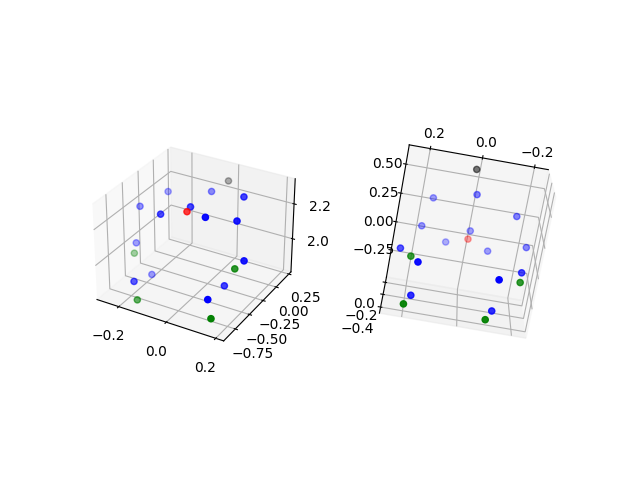

In [7]:
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

xs, ys, zs = frame_data[:, 1], frame_data[:, 2], frame_data[:, 3]
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter_1 = ax.scatter(xs, ys, zs, color=colors)
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter_2 = ax.scatter(xs_norm, ys_norm, zs_norm, color=colors)
plt.show()

<IPython.core.display.Javascript object>


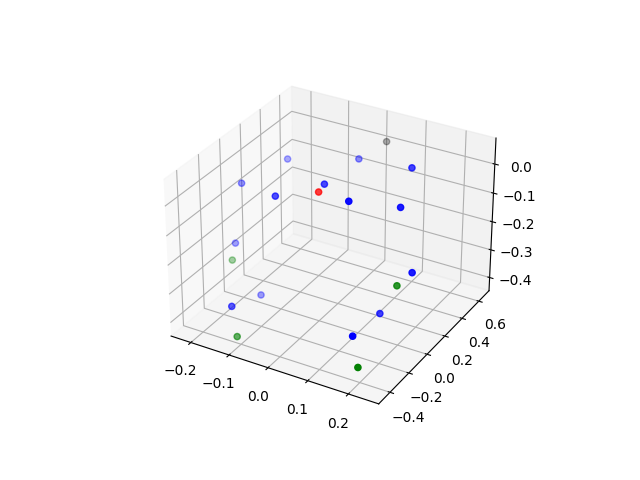

In [8]:
hip_zero = SN.zero_to_hip(frame_data)
xs_h, ys_h, zs_h = hip_zero[:,1], hip_zero[:,2], hip_zero[:,3]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs_h,ys_h,zs_h,color=colors)
# normalization to hip works as expected